In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from speedml import Speedml

sml = Speedml('data/train.csv', 
              'data/test.csv', 
              target = 'Survived',
              uid = 'PassengerId')
sml.shape()

C:\Users\khyeh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


'train (891, 11) | test (418, 10)'

In [3]:
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Nulls,1014,Use feature.impute.
Outliers Upper,"[SibSp, Fare]",Positive skew (> 3). Use feature.outliers(upper).
Shape,"train (891, 11) | test (418, 10)",
Numerical Ratio,54%,Aim for 100% numerical.
Numerical High-cardinality,"[Age, Fare]",(>10) categories. Use feature.density
Numerical Categorical,"[Survived, Pclass, SibSp, Parch]",Use plot.ordinal.
Text High-cardinality,"[Ticket, Cabin]",(>10) categories. Use feature.labels.
Text Categorical,"[Sex, Embarked]",Use feature.labels or feature.mapping.
Text Unique,[Name],~80% unique. Use feature.extract or feature.drop.


In [4]:
sml.feature.outliers('Fare', upper=98)
sml.feature.outliers('SibSp', upper=99)

'Fixed 17 or 1.91% upper outliers. '

'Fixed 7 or 0.79% upper outliers. '

In [5]:
sml.feature.density('Age')
sml.feature.density('Ticket')
sml.train[['Ticket', 'Ticket_density']].head()

,Ticket,Ticket_density
0,A/5 21171,1
1,PC 17599,1
2,STON/O2. 3101282,1
3,113803,2
4,373450,1


In [6]:
sml.feature.drop(['Ticket'])
sml.feature.fillna(a='Cabin', new='Z')
sml.feature.extract(new='Deck', a='Cabin', regex='([A-Z]){1}')
sml.feature.drop(['Cabin'])
sml.feature.mapping('Sex', {'male': 0, 'female': 1})
sml.feature.sum(new='FamilySize', a='Parch', b='SibSp')
sml.feature.add('FamilySize', 1)

'Dropped 1 features with 12 features available.'

'Filled 1014 null values across test and train datasets.'

'Dropped 1 features with 12 features available.'

In [7]:
sml.feature.drop(['Parch', 'SibSp'])
sml.feature.impute()
sml.feature.extract(new='Title', a='Name', regex=' ([A-Za-z]+)\.')

'Dropped 2 features with 11 features available.'

'Imputed 179 empty values to 0.'

In [8]:
sml.feature.replace(a='Title', match=['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], new='Rare')
sml.feature.replace('Title', 'Mlle', 'Miss')
sml.feature.replace('Title', 'Ms', 'Miss')
sml.feature.replace('Title', 'Mme', 'Mrs')

sml.feature.drop(['Name'])
sml.feature.labels(['Title', 'Embarked', 'Deck'])

'Replaced matching list of strings across train and test datasets.'

'Replaced 2 matching values across train and test datasets.'

'Replaced 2 matching values across train and test datasets.'

'Replaced 1 matching values across train and test datasets.'

'Dropped 1 features with 11 features available.'

In [9]:
sml.model.data()

'train_X: (891, 10) train_y: (891,) test_X: (418, 10)'

In [10]:
result = sml.eda()
result

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Shape,"train (891, 11) | test (418, 10)",
Numerical High-cardinality,"[Age, Age_density, Fare]",(>10) categories. Use feature.density
Numerical Categorical,"[Deck, Embarked, FamilySize, Pclass, Sex, Surv...",Use plot.ordinal.
Target Analysis (Survived),Model ready.,Use classification models.


In [11]:
cat_cols = result['Results'][3]
cat_cols

['Deck',
 'Embarked',
 'FamilySize',
 'Pclass',
 'Sex',
 'Survived',
 'Ticket_density',
 'Title']

In [12]:
cat_cols.remove('Survived')

In [13]:
train = sml.train
test = sml.test
train_length = train.shape[0]

In [14]:
all_df = pd.concat([train, test], axis=0)
print(all_df.shape)

(1309, 11)


In [15]:
all_df = pd.get_dummies(all_df, columns=cat_cols)
all_df.head(3)

,Age,Age_density,Fare,Survived,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,...,Ticket_density_3,Ticket_density_4,Ticket_density_5,Ticket_density_6,Ticket_density_7,Title_0,Title_1,Title_2,Title_3,Title_4
0,22.0,27,7.2500,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38.0,11,71.2833,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,26.0,18,7.9250,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
train = all_df.iloc[:train_length]
test = all_df.iloc[train_length:]
test.drop('Survived', inplace=True, axis=1)

C:\Users\khyeh\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [20]:
train.to_csv('data\preprocessed_train.csv', float_format="%.6f", encoding='utf-8', index=False)
test.to_csv('data\preprocessed_test.csv', float_format="%.6f", encoding='utf-8', index=False)

In [48]:
print(train.shape)
print(test.shape)

(891, 42)
(418, 41)


In [49]:
sml_new = Speedml('data/preprocessed_train.csv', 
              'data/preprocessed_test.csv', 
              target = 'Survived')
sml_new.shape()

'train (891, 42) | test (418, 41)'

In [50]:
sml_new.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Outliers Upper,"[Deck_0, Deck_1, Deck_2, Deck_3, Deck_4, Deck_...",Positive skew (> 3). Use feature.outliers(upper).
Shape,"train (891, 42) | test (418, 41)",
Numerical High-cardinality,"[Age, Age_density, Fare]",(>10) categories. Use feature.density
Numerical Categorical,"[Survived, Deck_0, Deck_1, Deck_2, Deck_3, Dec...",Use plot.ordinal.
Target Analysis (Survived),Model ready.,Use classification models.


In [51]:
select_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
fixed_params = {'learning_rate': 0.1, 'subsample': 0.8, 
                'colsample_bytree': 0.8, 'seed':0, 
                'objective': 'binary:logistic'}

print(sml_new.xgb.hyper(select_params, fixed_params))

   rank                                   params
4     1  {'max_depth': 5, 'min_child_weight': 3}
8     2  {'max_depth': 7, 'min_child_weight': 5}
5     3  {'max_depth': 5, 'min_child_weight': 5}
0     4  {'max_depth': 3, 'min_child_weight': 1}
1     4  {'max_depth': 3, 'min_child_weight': 3}
7     6  {'max_depth': 7, 'min_child_weight': 3}
3     7  {'max_depth': 5, 'min_child_weight': 1}
2     8  {'max_depth': 3, 'min_child_weight': 5}
6     9  {'max_depth': 7, 'min_child_weight': 1}


In [52]:
select_params = {'max_depth': [4,5,6], 'min_child_weight': [2, 2.5, 3, 3.5, 4, 4.5]}
fixed_params = {'learning_rate': 0.1, 'subsample': 0.8, 
                'colsample_bytree': 0.8, 'seed':0, 
                'objective': 'binary:logistic'}

print(sml_new.xgb.hyper(select_params, fixed_params))

    rank                                     params
8      1    {'max_depth': 5, 'min_child_weight': 3}
1      2  {'max_depth': 4, 'min_child_weight': 2.5}
4      2    {'max_depth': 4, 'min_child_weight': 4}
14     4    {'max_depth': 6, 'min_child_weight': 3}
13     4  {'max_depth': 6, 'min_child_weight': 2.5}
11     6  {'max_depth': 5, 'min_child_weight': 4.5}
16     6    {'max_depth': 6, 'min_child_weight': 4}
17     6  {'max_depth': 6, 'min_child_weight': 4.5}
5      6  {'max_depth': 4, 'min_child_weight': 4.5}
10    10    {'max_depth': 5, 'min_child_weight': 4}
3     10  {'max_depth': 4, 'min_child_weight': 3.5}
2     12    {'max_depth': 4, 'min_child_weight': 3}
0     12    {'max_depth': 4, 'min_child_weight': 2}
9     14  {'max_depth': 5, 'min_child_weight': 3.5}
12    14    {'max_depth': 6, 'min_child_weight': 2}
7     14  {'max_depth': 5, 'min_child_weight': 2.5}
6     17    {'max_depth': 5, 'min_child_weight': 2}
15    18  {'max_depth': 6, 'min_child_weight': 3.5}


In [53]:
select_params = {'learning_rate': [0.3, 0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
fixed_params = {'max_depth': 5, 'min_child_weight': 3, 
                'colsample_bytree': 0.8, 'seed':0, 
                'objective': 'binary:logistic'}

print(sml_new.xgb.hyper(select_params, fixed_params))

   rank                                     params
3     1   {'learning_rate': 0.1, 'subsample': 0.7}
4     2   {'learning_rate': 0.1, 'subsample': 0.8}
5     3   {'learning_rate': 0.1, 'subsample': 0.9}
0     4   {'learning_rate': 0.3, 'subsample': 0.7}
1     5   {'learning_rate': 0.3, 'subsample': 0.8}
2     6   {'learning_rate': 0.3, 'subsample': 0.9}
6     7  {'learning_rate': 0.01, 'subsample': 0.7}
7     8  {'learning_rate': 0.01, 'subsample': 0.8}
8     9  {'learning_rate': 0.01, 'subsample': 0.9}


In [54]:
select_params = {'learning_rate': [0.2, 0.15, 0.1, 0.05], 'subsample': [0.4, 0.5, 0.6, 0.7]}
fixed_params = {'max_depth': 5, 'min_child_weight': 3, 
                'colsample_bytree': 0.8, 'seed':0, 
                'objective': 'binary:logistic'}

print(sml_new.xgb.hyper(select_params, fixed_params))

    rank                                     params
11     1   {'learning_rate': 0.1, 'subsample': 0.7}
10     2   {'learning_rate': 0.1, 'subsample': 0.6}
7      3  {'learning_rate': 0.15, 'subsample': 0.7}
4      4  {'learning_rate': 0.15, 'subsample': 0.4}
15     5  {'learning_rate': 0.05, 'subsample': 0.7}
14     6  {'learning_rate': 0.05, 'subsample': 0.6}
1      7   {'learning_rate': 0.2, 'subsample': 0.5}
9      7   {'learning_rate': 0.1, 'subsample': 0.5}
3      9   {'learning_rate': 0.2, 'subsample': 0.7}
0     10   {'learning_rate': 0.2, 'subsample': 0.4}
5     10  {'learning_rate': 0.15, 'subsample': 0.5}
6     10  {'learning_rate': 0.15, 'subsample': 0.6}
8     13   {'learning_rate': 0.1, 'subsample': 0.4}
13    13  {'learning_rate': 0.05, 'subsample': 0.5}
2     15   {'learning_rate': 0.2, 'subsample': 0.6}
12    15  {'learning_rate': 0.05, 'subsample': 0.4}


In [55]:
select_params = {'learning_rate': [0.2, 0.15, 0.1, 0.05], 'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
fixed_params = {'max_depth': 5, 'min_child_weight': 3, 
                'subsample': 0.7, 'seed':0, 
                'objective': 'binary:logistic'}

print(sml_new.xgb.hyper(select_params, fixed_params))

    rank                                            params
18     1   {'colsample_bytree': 0.8, 'learning_rate': 0.1}
5      1  {'colsample_bytree': 0.5, 'learning_rate': 0.15}
1      3  {'colsample_bytree': 0.4, 'learning_rate': 0.15}
10     4   {'colsample_bytree': 0.6, 'learning_rate': 0.1}
2      4   {'colsample_bytree': 0.4, 'learning_rate': 0.1}
17     4  {'colsample_bytree': 0.8, 'learning_rate': 0.15}
6      7   {'colsample_bytree': 0.5, 'learning_rate': 0.1}
14     8   {'colsample_bytree': 0.7, 'learning_rate': 0.1}
13     8  {'colsample_bytree': 0.7, 'learning_rate': 0.15}
12     8   {'colsample_bytree': 0.7, 'learning_rate': 0.2}
0      8   {'colsample_bytree': 0.4, 'learning_rate': 0.2}
19     8  {'colsample_bytree': 0.8, 'learning_rate': 0.05}
22    13   {'colsample_bytree': 0.9, 'learning_rate': 0.1}
9     13  {'colsample_bytree': 0.6, 'learning_rate': 0.15}
21    13  {'colsample_bytree': 0.9, 'learning_rate': 0.15}
8     16   {'colsample_bytree': 0.6, 'learning_rate': 0.

    test-error-mean  test-error-std  train-error-mean  train-error-std
0          0.208989        0.030023          0.174438         0.008257
1          0.207865        0.028866          0.168820         0.003128
2          0.210112        0.016891          0.169663         0.005784
3          0.203371        0.012512          0.162921         0.007325
4          0.194382        0.016127          0.156742         0.008024
5          0.194382        0.014477          0.152528         0.010682
6          0.203371        0.014389          0.152247         0.010458
7          0.200000        0.013103          0.150842         0.009714
8          0.195505        0.005504          0.150000         0.007815
9          0.195505        0.008989          0.144663         0.008238
10         0.194382        0.009795          0.146910         0.008776
11         0.193258        0.010420          0.145225         0.008909
12         0.191011        0.018463          0.145225         0.006800
13    

'Accuracy = 89.67%. Found 799 correct of 891 total labels'

'Results saved.'

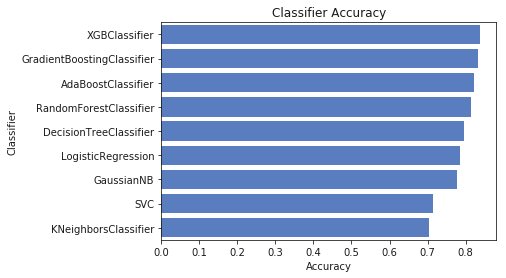

In [56]:
tuned_params = {'learning_rate': 0.1, 'subsample': 0.7, 
                'max_depth': 5, 'min_child_weight': 3,
                'seed':0, 'colsample_bytree': 0.8, 
                'objective': 'binary:logistic'}
sml_new.xgb.cv(tuned_params)
print(sml_new.xgb.cv_results)
tuned_params['n_estimators'] = sml_new.xgb.cv_results.shape[0] - 1
sml_new.xgb.params(tuned_params)
sml_new.xgb.classifier()
# Model evaluation across multiple classifiers based on accuracy of predictions.
sml_new.model.evaluate()

# Plot ranking among accuracy offered by various models based on our datasets.
sml_new.plot.model_ranks()
print(sml_new.model.ranks())
sml_new.xgb.fit()
sml_new.xgb.predict()
#sml.plot.xgb_importance()
sml_new.xgb.feature_selection()
sml_new.xgb.sample_accuracy()
sml_new.save_results(
    columns={ 'PassengerId': sml.uid,
             'Survived': sml_new.xgb.predictions }, 
    file_path='xg_submission.csv')